In [1]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from ray.tune import ExperimentAnalysis

/home/albin/anaconda3/envs/ocl_survey/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
analysis_full = ExperimentAnalysis("/home/albin/ray_results/train_function_2023-06-09_14-40-55")
analysis_4 = ExperimentAnalysis("/home/albin/ray_results/train_function_2023-06-16_13-31-41")

In [3]:
df_full = analysis_full.dataframe(metric="final_accuracy", mode="max")
df_4 = analysis_4.dataframe(metric="final_accuracy", mode="max")
print(df_full)

    final_accuracy  time_this_iter_s   done  training_iteration  trial_id  \
0           0.0636        660.864912  False                   1  023a792a   
1           0.2472       1483.086335  False                   1  0526ab5e   
2           0.3412       1636.993085  False                   1  08317240   
3           0.1920        496.062263  False                   1  0a323a49   
4           0.3028        754.944784  False                   1  0bf405ca   
5           0.3300       1630.654891  False                   1  0caa104a   
6           0.2900       1040.054831  False                   1  1126d48f   
7           0.2952        995.021311  False                   1  1145bcce   
8           0.3400       1321.672009  False                   1  13eacd7e   
9           0.2352        649.557751  False                   1  180404a5   
10          0.1152       1332.343786  False                   1  1afa8b5a   
11          0.3188        985.331173  False                   1  1e4607e8   

In [ ]:
sns.scatterplot(data=df_full, x="config/alpha", y="config/alpha_ramp", hue="final_accuracy", size="final_accuracy")

In [5]:
# Alpha vs Alpha ramp
sns.scatterplot(data=df_4, x="config/alpha", y="config/alpha_ramp", hue="final_accuracy", size="final_accuracy")

ValueError: Could not interpret value `config/alpha` for parameter `x`

In [7]:
# Train Epochs, LR, Alpha
sns.lmplot(data=df_full, x="config/strategy/alpha_ramp", y="final_accuracy", order=2)#, hue="config/optimizer/lr")

KeyError: "['config/strategy/alpha_ramp'] not in index"

(0.0, 1.0)

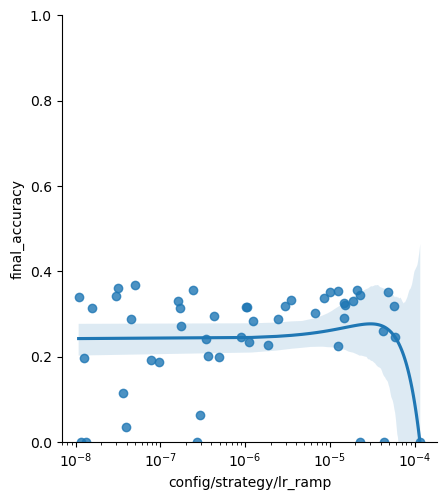

In [11]:
# Train Epochs, LR, Alpha
import matplotlib.pyplot as plt

grid = sns.lmplot(data=df_full, x="config/strategy/lr_ramp", y="final_accuracy", order=2)# size="config/optimizer/lr")
grid.set(xscale="log")
plt.ylim((0, 1))

[None]

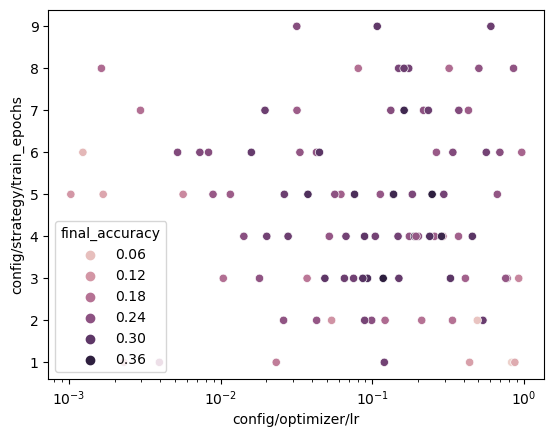

In [4]:
# Alpha vs Alpha ramp
grid = sns.scatterplot(data=df_4, x="config/optimizer/lr", y="config/strategy/train_epochs", hue="final_accuracy")
grid.set(xscale="log")

In [5]:
print(analysis_full.get_best_config(metric="final_accuracy", mode="max"))
print(analysis_4.get_best_config(metric="final_accuracy", mode="max"))

{'optimizer': {'lr': 0.07935153373211679}, 'strategy': {'train_epochs': 7, 'lr_ramp': 5.079875180679228e-08}}
{'optimizer': {'lr': 0.11792814412084202}, 'strategy': {'train_epochs': 3, 'batch_size_mem': 55}}


In [6]:
df_4["final_accuracy"].max()

0.362